<a href="https://colab.research.google.com/github/redman157/phamson/blob/master/XulySalePrice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Run this cell and select the kaggle.json file downloaded
# from the Kaggle account settings page.
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"pson2809","key":"748aebab94289a6e4f297db256a595c8"}'}

In [3]:
# Let's make sure the kaggle.json file is present.
!ls -lha kaggle.json

-rw-r--r-- 1 root root 64 Nov 24 01:20 kaggle.json


In [0]:
# Next, install the Kaggle API client.
!pip install -q kaggle

In [0]:
# The Kaggle API client expects this file to be in ~/.kaggle,
# so move it there.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

# This permissions change avoids a warning on Kaggle tool startup.
!chmod 600 ~/.kaggle/kaggle.json

In [6]:
# List available datasets.
!kaggle datasets list

ref                                                      title                                               size  lastUpdated          downloadCount  
-------------------------------------------------------  -------------------------------------------------  -----  -------------------  -------------  
kaggle/kaggle-survey-2018                                2018 Kaggle ML & DS Survey Challenge                 4MB  2018-11-03 22:35:07           4374  
jacobbaruch/nba-player-of-the-week                       NBA player of the week                              16KB  2018-08-18 20:41:30           3621  
center-for-policing-equity/data-science-for-good         Data Science for Good: Center for Policing Equity   43MB  2018-10-29 23:55:11           2414  
lava18/google-play-store-apps                            Google Play Store Apps                               2MB  2018-09-18 20:49:49          21967  
olistbr/brazilian-ecommerce                              Brazilian E-Commerce Public Dat

In [7]:
!kaggle competitions download -c house-prices-advanced-regression-techniques

  0% 0.00/13.1k [00:00<?, ?B/s]
100% 13.1k/13.1k [00:00<00:00, 7.76MB/s]
  0% 0.00/89.2k [00:00<?, ?B/s]
100% 89.2k/89.2k [00:00<00:00, 43.9MB/s]
  0% 0.00/450k [00:00<?, ?B/s]
100% 450k/450k [00:00<00:00, 69.4MB/s]
  0% 0.00/82.0k [00:00<?, ?B/s]
100% 82.0k/82.0k [00:00<00:00, 48.3MB/s]
  0% 0.00/441k [00:00<?, ?B/s]
100% 441k/441k [00:00<00:00, 80.6MB/s]
  0% 0.00/15.3k [00:00<?, ?B/s]
100% 15.3k/15.3k [00:00<00:00, 12.7MB/s]
  0% 0.00/31.2k [00:00<?, ?B/s]
100% 31.2k/31.2k [00:00<00:00, 31.0MB/s]


In [8]:
!pip install xgboost
!pip install graphviz

In [0]:
import xgboost as xgb
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from xgboost import plot_tree
from sklearn.preprocessing import StandardScaler, Imputer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
df_train = pd.read_csv('train.csv.gz')
df_test = pd.read_csv('test.csv.gz')

X_train = df_train.drop('SalePrice',axis = 1)
y_train = df_train.SalePrice

In [0]:
var = 'GrLivArea'
data = pd.concat([df_train.SalePrice,df_train[var]],axis = 1)
#data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));
var = 'TotalBsmtSF'
data = pd.concat([df_train['SalePrice'], df_train[var]], axis=1)
#data.plot.scatter(x=var, y='SalePrice', ylim=(0,800000));

In [0]:
total = df_train.isnull().sum().sort_values(ascending=False)
#total = total.drop(total[total == 0].index)
# tong so luong null va sap xep theo thu tu giam dan
percent = (df_train.isnull().sum()/df_train.isnull().count()).sort_values(ascending=False)
#percent = percent.drop(percent[percent == 0].index)

# tong so luong null / so khong null dem dc va sap xep giam dan
missing_data = pd.concat([total,percent],axis = 1, keys=['total','percent'])
#missing_data
# f, ax = plt.subplots(figsize = (10,6))
# plt.xticks(rotation='80')
# plt.xlabel('Features')
# plt.ylabel('Percent')
# sns.barplot(x = missing_data.index,y = percent)

In [170]:
df_train = df_train.drop((missing_data[missing_data['total'] > 1]).index,1)
df_train = df_train.drop(df_train.loc[df_train['Electrical'].isnull()].index)
df_train.isnull().sum().max()

0

In [0]:
from sklearn.preprocessing import LabelEncoder
number = df_train.dtypes[df_train.dtypes !='object'].index
categorical = df_train.dtypes[df_train.dtypes =='object'].index
def xulydata(path):
#   cols = []
#   for c in df_train[path]:
#     cols.append(df_train[c].astype("category").cat.codes)
#   else:
#     df = pd.concat(cols, axis=1, keys=categorical)
  df= pd.concat([df_train[c].astype("category").cat.codes for c in df_train[path]], 
                 axis=1, 
                 keys=categorical)
  return df
#     s = df_train[c].unique()
#     label, levels = pd.factorize(s)
#     print('cols',c, 'is', label)
#     #df_train[c] = df_train[c[c]]    
df_train[categorical] = xulydata(categorical)


In [237]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
df_test = pd.read_csv('test.csv.gz')
categorical_test = df_test.dtypes[df_test.dtypes == 'object'].index
total_test = df_test.isnull().sum()
total_t = total_test 
percent_test = (df_test.isnull().sum()/df_test.isnull().count()).sort_values(ascending = False)

missing_test = pd.concat([total_test,percent_test],axis = 1, keys = ['total_test','percent_test'])
missing_test
#df_test[categorical_test] = xulydata(categorical_test)

,total_test,percent_test
PoolQC,1456,0.997944
MiscFeature,1408,0.965045
Alley,1352,0.926662
Fence,1169,0.801234
FireplaceQu,730,0.500343
LotFrontage,227,0.155586
GarageCond,78,0.053461
GarageQual,78,0.053461
GarageYrBlt,78,0.053461
GarageFinish,78,0.053461


In [0]:
df_test = df_test.drop((missing_test[missing_test['total_test'] >4]).index,1)
df_test = df_test.drop(df_test.loc[df_test['MSZoning'].isnull()].index)

In [243]:
df_test[df_test.isnull().any()].columns()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


IndexingError: ignored

In [0]:
# chuan hoa data dua chung ve trong khoang tu 0 > 1 
saleprice_scaled = StandardScaler().fit_transform(df_train.SalePrice[:,np.newaxis]);
#saleprice_scaled.fit_transform(df_train.SalePrice[:,np.newaxis]);
#print(saleprice_scaled)
low_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][:10]
print('tim gioi han thap nhat: \n',low_range)
high_range = saleprice_scaled[saleprice_scaled[:,0].argsort()][-10:]
print('tim gioi han cao nhat: \n',high_range)
saleprice_scaled[:,0].argsort()


tim gioi han thap nhat: 
 [[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]
tim gioi han cao nhat: 
 [[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


array([ 495,  916,  968, ..., 1169, 1182,  691])

In [0]:
df_train.sort_values(by = 'GrLivArea',ascending = True)[:10]
# lay toan bo data va sap xep chung theo Cot GrLivArea
df_train = df_train.drop(df_train[df_train['Id'] == 1299].index)
df_train = df_train.drop(df_train[df_train['Id'] == 524].index)


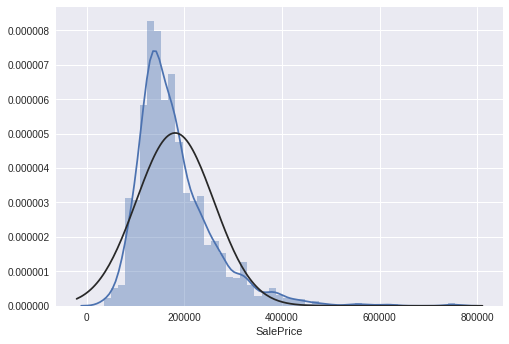

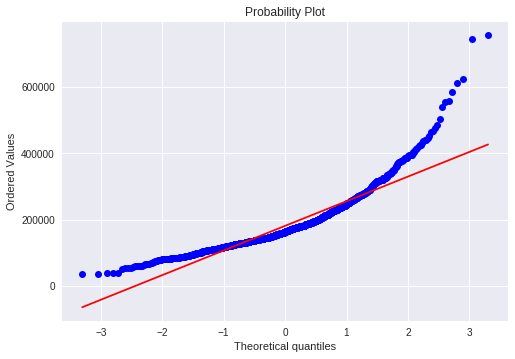

In [0]:
from scipy.stats import norm
from scipy import stats
import matplotlib.pyplot as plt
sns.distplot(df_train['SalePrice'],fit= norm);
fig = plt.figure()
res = stats.probplot(df_train.SalePrice,plot= plt)

In [0]:
df_train['SalePrice']= np.log(df_train['SalePrice'])
# log(np.exp(X))
df_train['SalePrice']

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
5       11.870600
6       12.634603
7       12.206073
8       11.774520
9       11.678440
10      11.771436
11      12.751300
12      11.877569
13      12.540758
14      11.964001
15      11.790557
16      11.911702
17      11.407565
18      11.976659
19      11.842229
20      12.692503
21      11.845103
22      12.345835
23      11.774520
24      11.944708
25      12.454104
26      11.811547
27      12.631340
28      12.242887
29      11.134589
          ...    
1430    12.165980
1431    11.875831
1432    11.074421
1433    12.136187
1434    11.982929
1435    12.066811
1436    11.699405
1437    12.885671
1438    11.916389
1439    12.190959
1440    12.160029
1441    11.913713
1442    12.644328
1443    11.703546
1444    12.098487
1445    11.767568
1446    11.969717
1447    12.388394
1448    11.626254
1449    11.429544
1450    11.820410
1451    12.567551
1452    11.884489
1453    11.344507
1454    12

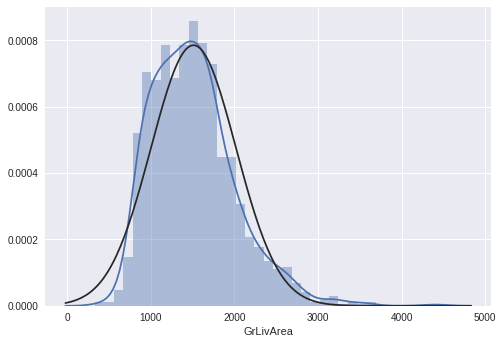

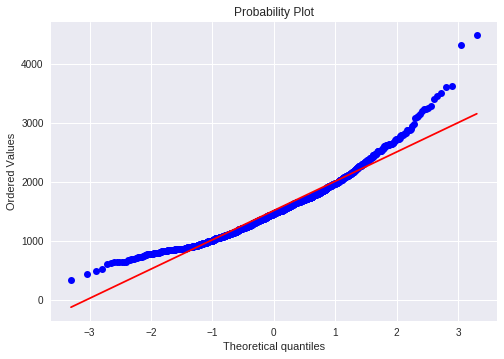

In [0]:
# khi chuyen ve log cac gia tri da dc chuan hoa 
sns.distplot(df_train['GrLivArea'], fit=norm);
fig = plt.figure()
res = stats.probplot(df_train['GrLivArea'], plot=plt)

In [0]:
df_train['HasBsmt'] = pd.Series(len(df_train['TotalBsmtSF']), index=df_train.index)
df_train['HasBsmt'] = 0
df_train.loc[df_train['TotalBsmtSF']>0,'HasBsmt'] =1
df_train['HasBsmt']

0       1
1       1
2       1
3       1
4       1
5       1
6       1
7       1
8       1
9       1
10      1
11      1
12      1
13      1
14      1
15      1
16      1
17      0
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      1
27      1
28      1
29      1
       ..
1430    1
1431    1
1432    1
1433    1
1434    1
1435    1
1436    1
1437    1
1438    1
1439    1
1440    1
1441    1
1442    1
1443    1
1444    1
1445    1
1446    1
1447    1
1448    1
1449    1
1450    1
1451    1
1452    1
1453    1
1454    1
1455    1
1456    1
1457    1
1458    1
1459    1
Name: HasBsmt, Length: 1457, dtype: int64

In [0]:
df_train[df_train['TotalBsmtSF']>0]['TotalBsmtSF']
df_train.loc[df_train['HasBsmt']==1,'TotalBsmtSF'] = np.log(df_train['TotalBsmtSF'])
df_train.TotalBsmtSF

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


0       0.647040
1       0.675887
2       0.652586
3       0.637269
4       0.668884
5       0.641358
6       0.695914
7       0.666420
8       0.655185
9       0.658212
10      0.661815
11      0.670760
12      0.651919
13      0.687700
14      0.675377
15      0.644828
16      0.659188
17      0.000000
18      0.666881
19      0.661024
20      0.669704
21      0.623330
22      0.699423
23      0.661815
24      0.663226
25      0.690922
26      0.650905
27      0.696626
28      0.687238
29      0.606060
          ...   
1430    0.634686
1431    0.655660
1432    0.625762
1433    0.653899
1434    0.667664
1435    0.679020
1436    0.647760
1437    0.704930
1438    0.651919
1439    0.609176
1440    0.616620
1441    0.646311
1442    0.660150
1443    0.655185
1444    0.684286
1445    0.643116
1446    0.671555
1447    0.673467
1448    0.612465
1449    0.622412
1450    0.650563
1451    0.691226
1452    0.610448
1453    0.668565
1454    0.673526
1455    0.655264
1456    0.689868
1457    0.6693

In [0]:
# import pandas as pd
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import Imputer

# data = pd.read_csv('train.csv.gz')
# data.dropna(axis=0, subset=['SalePrice'], inplace=True)
# y = data.SalePrice
# X = data.drop(['SalePrice'], axis=1).select_dtypes(exclude=['object'])
# train_X, test_X, train_y, test_y = train_test_split(X.as_matrix(), y.as_matrix(), test_size=0.25)

# from xgboost import XGBRegressor

# my_model = XGBRegressor()
# # Add silent=True to avoid printing out updates with each cycle
# my_model.fit(train_X, train_y, verbose=False)
# predictions = my_model.predict(test_X)
# import matplotlib.pyplot as plt
# params = {"objective":"reg:linear",'colsample_bytree': 0.3,'learning_rate': 0.1,
#                 'max_depth': 5, 'alpha': 10}
# data_matrix = xgb.DMatrix(data = X,label=y)
# xg_reg = xgb.train(params=params,dtrain = data_matrix,num_boost_round=10)
# xgb.plot_tree(xg_reg,num_trees=0)
# plt.rcParams['figure.figsize'] = [100, 20]
# plt.show()